In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
all_set = pd.read_csv('./data/[회귀]all_1차_전처리_완료.csv')

In [19]:
all_set.shape

(1178431, 7)

In [20]:
all_set.head()

,진입시각,진출시각,입출구명,고객구분,차종,주차시간(분),연도
0,2017-01-01 00:00:47,2017-01-07 17:21:59,후문,정기권,소형,9682,2017
1,2017-01-01 00:02:54,2017-01-01 17:39:08,구의문,정기권,소형,1057,2017
2,2017-01-01 00:05:14,2017-01-01 20:49:35,정문,일반,소형,1245,2017
3,2017-01-01 00:09:14,2017-01-01 14:32:37,구의문,정기권,소형,864,2017
4,2017-01-01 00:25:43,2017-01-01 08:41:00,후문,일반,소형,494,2017


# 주차시간 아웃라이어 제거

1. 15분 이하로 체류했던 차량 데이터 제거
2. 780분(영업시간 내 최대 가능시간) 이상으로 체류한 차량 데이터 제거

In [21]:
all_set['주차시간(분)'].describe()

count    1.178431e+06
mean     2.083875e+02
std      8.930476e+02
min     -3.000000e+00
25%      5.200000e+01
50%      1.240000e+02
75%      2.100000e+02
max      2.144450e+05
Name: 주차시간(분), dtype: float64

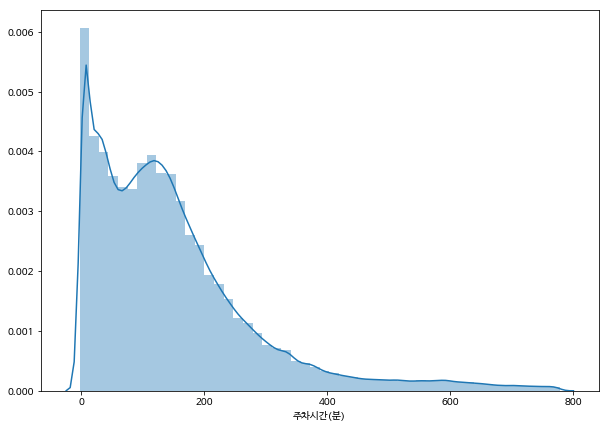

In [22]:
alldf_780 = all_set[all_set['주차시간(분)'] < 780]

plt.figure(figsize=(10,7))
sns.distplot(alldf_780['주차시간(분)'])

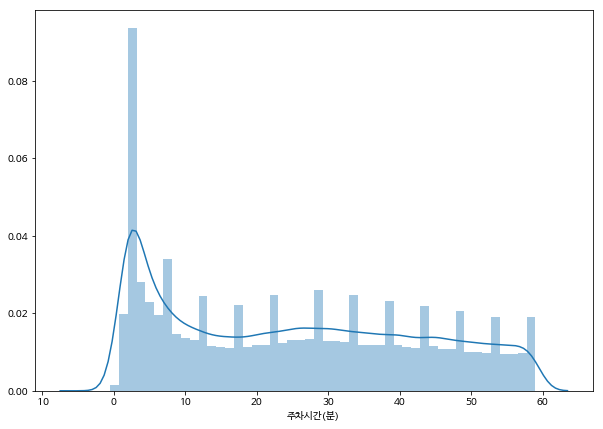

In [23]:
alldf_60 = all_set[all_set['주차시간(분)'] < 60]

plt.figure(figsize=(10,7))
sns.distplot(alldf_60['주차시간(분)'])

In [24]:
all_set_save = all_set.copy()
all_set = all_set.loc[(all_set['주차시간(분)'] > 15) & (all_set['주차시간(분)'] < 780)]

In [25]:
all_set.shape

(1027306, 7)

# 날짜 변경될때까지 주차되어있는 데이터 제거

In [26]:
all_set['진입시각'] = pd.to_datetime(all_set['진입시각'])
all_set['진출시각'] = pd.to_datetime(all_set['진출시각'])

In [27]:
all_set['in_year'] = all_set['진입시각'].dt.year
all_set['in_month'] = all_set['진입시각'].dt.month
all_set['in_date'] = all_set['진입시각'].dt.day
all_set['in_hour'] = all_set['진입시각'].dt.hour
all_set['in_minute'] = all_set['진입시각'].dt.minute
all_set['in_second'] = all_set['진입시각'].dt.second

all_set['out_year'] = all_set['진출시각'].dt.year
all_set['out_month'] = all_set['진출시각'].dt.month
all_set['out_date'] = all_set['진출시각'].dt.day
all_set['out_hour'] = all_set['진출시각'].dt.hour
all_set['out_minute'] = all_set['진출시각'].dt.minute
all_set['out_second'] = all_set['진출시각'].dt.second

In [28]:
samedate_df = all_set[(all_set['in_year'] == all_set['out_year']) & (all_set['in_month'] == all_set['out_month']) & (all_set['in_date'] == all_set['out_date'])]

In [29]:
samedate_df.shape

(1006421, 19)

# 영업시간 내 진입 & 진출한 데이터만 남기기

In [30]:
samedate_df = samedate_df[(samedate_df['in_hour'] >= 9) & (samedate_df['out_hour'] <= 22)]

In [31]:
samedate_df.shape

(897841, 19)

In [33]:
samedate_df.to_csv('./data/[회귀]all_2차_전처리_완료.csv', index=False)